# Image Generation from Process Models
This notebook can be used to render BPMN diagrams; it is based on the notebook [here](https://github.com/signavio/sap-sam/blob/main/notebooks/3_images_and_XMLs.ipynb)

## Setup
In order to render images, we need to create an account on [academic.signavio.com](academic.signavio.com) or on a commercial SAP Signavio system instance. To setup the integration with your SAP Signavio workspace, we create a file named ``conf.py`` in the `notebooks` directory of this project and specify the following variables:

* ``email``: the email address with which you have registered your account.
* ``pw``: your password -- use a password you do not use elsewhere and do not commit/share the ``conf.py`` file.
* ``tenant_id``: the ID of your workspace, which can be obtained by selecting **Help** - **Workspace information** in the explorer of SAP Signavio Process Manager.
* ``system_instance``: ``'https://academic.signavio.com'`` or the URL of a commercial system instance.

Below, we see an example configuration file:

```
email = 'jane@doe.org'
pw = '1234546'
tenant_id = 'cb0f0496e0ca1234562e881f9f654321'
system_instance = https://academic.signavio.com
```

This allows the underlying code to upload diagrams to a specific folder (named `SAP-SAM`) in your workspace so that the server can generate an image (PNG).
The folder does not need to be created manually (the SAP-SAM API takes care of this).

We import the following dependencies:

In [1]:
from IPython.display import Image, display
import json
import os
import pandas as pd
import xml.etree.ElementTree as ET
from pathlib import Path
pd.set_option("display.min_rows", 4)
from ImageGenerator import ImageGenerator

from semconstmining.config import Config
from semconstmining.parsing.label_parser.nlp_helper import NlpHelper
from semconstmining.main import get_resource_handler

## Loading Content

In [2]:
MODEL_COLLECTION = "semantic_sap_sam_filtered"

conf = Config(Path(os.getcwd()).parents[1].resolve(), MODEL_COLLECTION)
nlp_helper = NlpHelper(conf)
resource_handler = get_resource_handler(conf, nlp_helper)

[2023-08-23 14:19:43,473] p23855 {bert_wrapper.py:239} INFO - loading serialized model
[2023-08-23 14:19:45,734] p23855 {bert_wrapper.py:247} INFO - model loaded
[2023-08-23 14:19:47,112] p23855 {keyedvectors.py:2047} INFO - loading projection weights from /Users/adrianrebmann/gensim-data/glove-wiki-gigaword-50/glove-wiki-gigaword-50.gz
[2023-08-23 14:20:02,642] p23855 {utils.py:448} INFO - KeyedVectors lifecycle event {'msg': 'loaded (400000, 50) matrix of type float32 from /Users/adrianrebmann/gensim-data/glove-wiki-gigaword-50/glove-wiki-gigaword-50.gz', 'binary': False, 'encoding': 'utf8', 'datetime': '2023-08-23T14:20:02.642255', 'gensim': '4.3.1', 'python': '3.9.15 (main, Oct 11 2022, 22:27:25) \n[Clang 14.0.0 (clang-1400.0.29.102)]', 'platform': 'macOS-13.1-x86_64-i386-64bit', 'event': 'load_word2vec_format'}
[2023-08-23 14:20:02,724] p23855 {nlp_helper.py:96} INFO - Loaded 0 known embeddings and 238914 known similarities
[2023-08-23 14:20:02,725] p23855 {resource_handler.py:113

In [175]:
resource_handler.bpmn_models

,revision_id,organization_id,datetime,model_json,description,name,type,namespace
model_id,,,,,,,,
1bb03792264e4bd6914da6aafe094f34,c862620c30874e718c4e5377d894696e,1c635df1e6c04b328f041cac8f731405,2020-04-23 03:41:57,"{""resourceId"": ""canvas"", ""properties"": {""name""...",NaN,BPMN,NaN,http://b3mn.org/stencilset/bpmn2.0#
1bd1ef6b99d6492c9d533f9120462f18,4680cbf8d505451e94ff0580ff2fc276,7973fe1261884a9bac69a1165c1a7b0c,2021-09-21 16:03:43,"{""resourceId"": ""canvas"", ""properties"": {""name""...",NaN,Jane Doe - Receive prescription,NaN,http://b3mn.org/stencilset/bpmn2.0#
...,...,...,...,...,...,...,...,...
16bcaf8e45d44a20a46a0477bfd43ba5,a881e888e6d74324b720bcda36e6cb5f,32b515c77b4c4a9f997f0581f228f8a9,2019-11-06 09:37:14,"{""resourceId"": ""canvas"", ""properties"": {""name""...",NaN,W4-P6(REIMBURSEMENT1),NaN,http://b3mn.org/stencilset/bpmn2.0#
17e8c83325064d0fa0f33a3401bf6360,b3726f0410464aa388324bb8b6a470bf,7973fe1261884a9bac69a1165c1a7b0c,2021-08-31 16:14:18,"{""resourceId"": ""canvas"", ""properties"": {""name""...",NaN,Figure 3.4_Jane Doe,NaN,http://b3mn.org/stencilset/bpmn2.0#


In [209]:
MODEL_ID = "810ad40daaa34cceac3f53e6accc7dfa"#

model_info = resource_handler.bpmn_models.loc[MODEL_ID]
model_json = model_info["model_json"]

In addition, we need the model's namespace and name:

In [210]:
model_namespace = "http://b3mn.org/stencilset/bpmn2.0#"
# If the name cannot be obtained, the diagram can be named manually or by using a dummy label
model_name = json.loads(model_json)['properties']['name'] if 'name' in json.loads(model_json)['properties'] else ""
if model_name == "":
    model_name = MODEL_ID
print('Namespace:', model_namespace)
print('Name:', model_name)

Namespace: http://b3mn.org/stencilset/bpmn2.0#
Name: 810ad40daaa34cceac3f53e6accc7dfa


## Rendering Images
Now, we can use the SAP-SAM API to create the diagram in SAP Signavio Process Manager and have it generate the image:

{'rel': 'mod', 'href': '/model/bfa6415a870040e2a47f8b16da935b01', 'rep': {'parent': '/directory/0de3bb7d1ec9459bbcf0267a44488348', 'formats': {}, 'granted_revision_user': '', 'isLicensedStencilSet': True, 'granted_revision_user_name': '', 'description': '', 'type': 'Business Process Diagram (BPMN 2.0)', 'sri_revision': 'sri:eu:651906300b684109b4e494c743c793dc:spm:model/bfa6415a870040e2a47f8b16da935b01:revision/1a6a7485c3034beeb53fe7e885520414', 'sri_path': 'sri:eu:651906300b684109b4e494c743c793dc:spm:directory/76aa768f908344fdba91a1c22d9639be;sri:eu:651906300b684109b4e494c743c793dc:spm:directory/0de3bb7d1ec9459bbcf0267a44488348', 'isDeployed': False, 'granted_revision': '', 'rev': 1, 'created': '2023-08-23 13:41:20 +0000', 'author': '/user/f4e913741deb486a91306303b0352e71', 'granted_revision_date': '', 'sri': 'sri:eu:651906300b684109b4e494c743c793dc:spm:model/bfa6415a870040e2a47f8b16da935b01', 'authorCompany': 'University of Mannheim ', 'revision': '/revision/1a6a7485c3034beeb53fe7e885

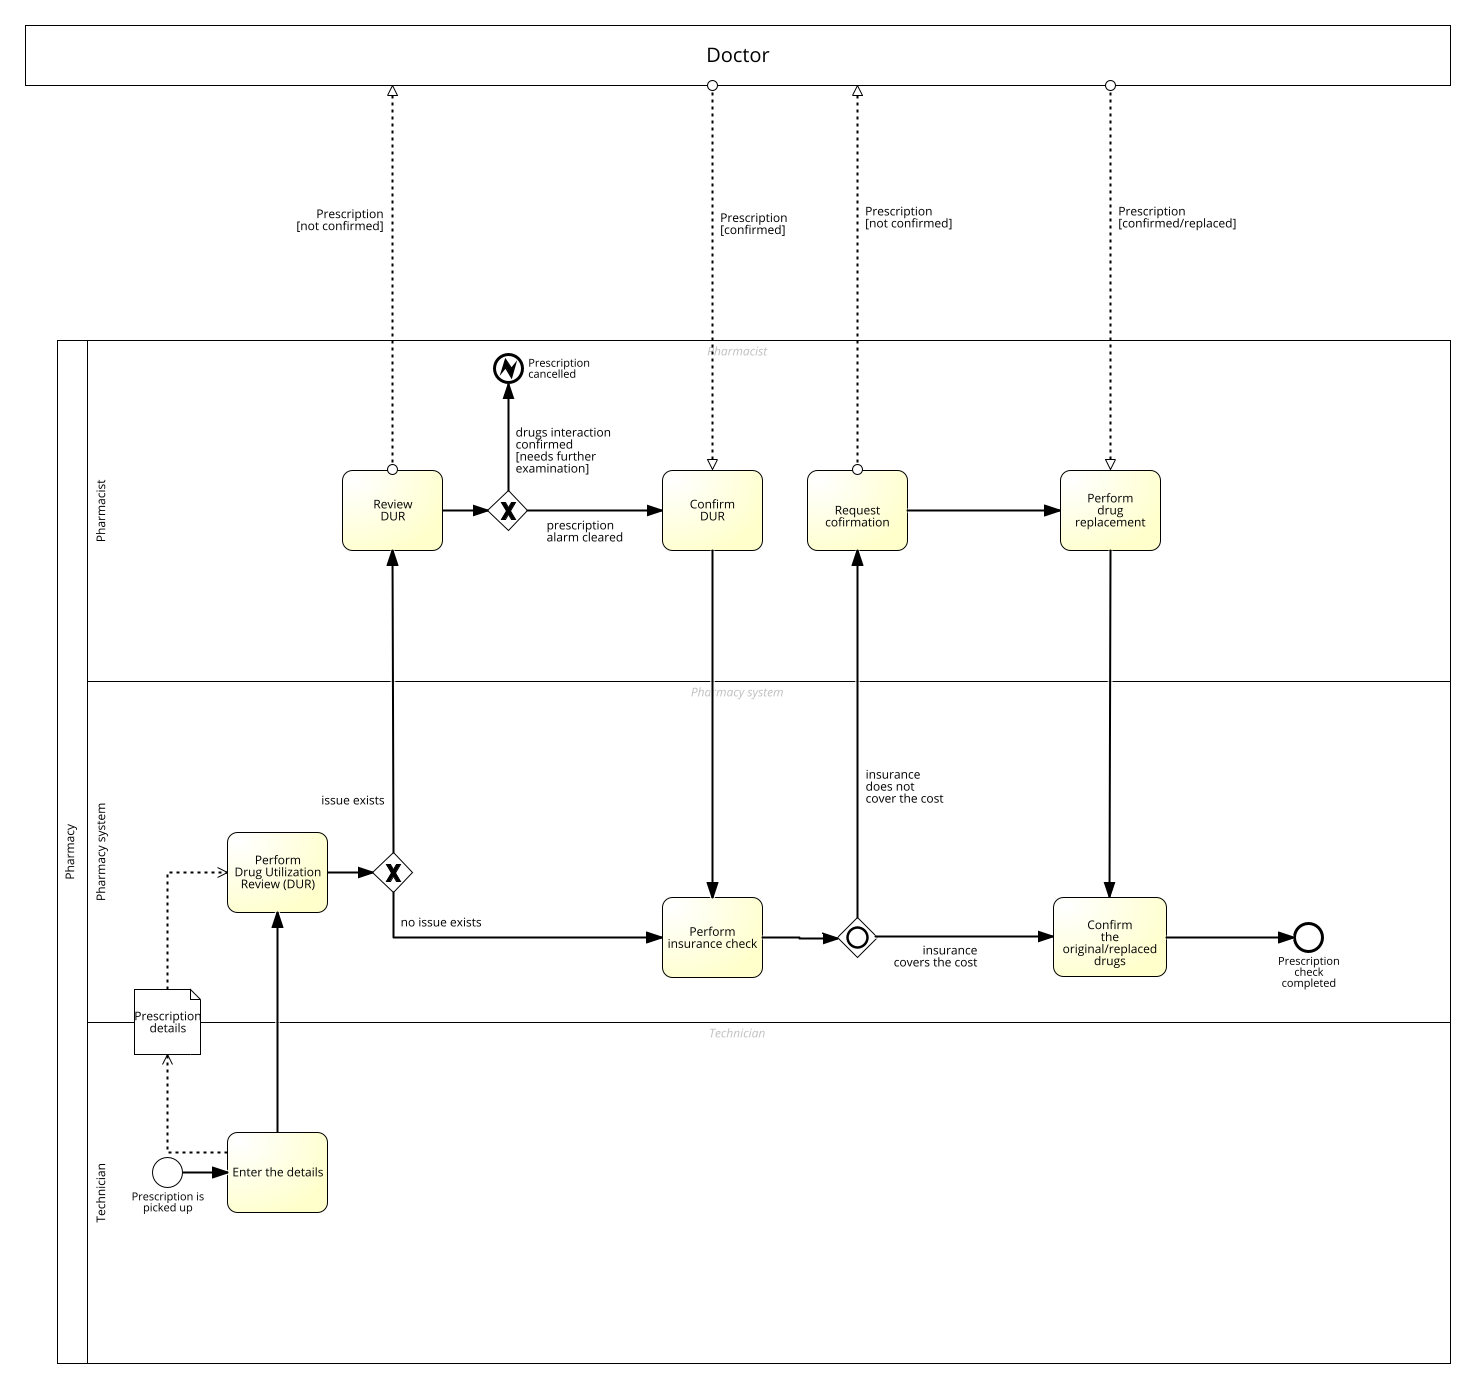

In [211]:
gen = ImageGenerator()
image_request = gen.generate_image(model_name, model_json, model_namespace)
display(Image(image_request))

Note that the diagram was stored in the `SAP-SAM` folder of the SAP Signavio workspace, but is deleted immediately after the PNG is obtained. In case deletion is undesired, change the method call to `gen.generate_image(model_name, model_json, model_namespace, deletes=False)`.